In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import easypyplot
import zsimparse as zp
import numpy as np
import copy

In [8]:
all_data = dict()
plot_name = {554: 'roms', 602: 'gcc', 605: 'mcf', 620: 'omnetpp', 619: 'lbm', 657: 'xz'}

In [9]:
# Graph2: sampled block MPKI

log_path_dict = {
    602: '/scorpio/home/liyiwei/pom-research/result/baryon_micro22_stability/results/602.gcc_s_8core-ref-stagesize_64-5700/stdout',
    554: '/scorpio/home/liyiwei/pom-research/result/baryon_micro22_stability/results/554.roms_r_8core-ref-stagesize_64-27352/stdout',
    605: '/scorpio/home/liyiwei/pom-research/result/baryon_micro22_stability/results/605.mcf_s_8core-ref-stagesize_64-28947/stdout_1',
    620: '/scorpio/home/liyiwei/pom-research/result/baryon_micro22_stability/results/620.omnetpp_s_8core-ref-stagesize_64-61640/stdout',
    657:'/scorpio/home/liyiwei/pom-research/result/baryon_micro22_stability/results/657.xz_s_8core-ref-stagesize_64-57809/stdout',
}

# log_path = '/scorpio/home/liyiwei/pom-research/result/baryon_micro22_stability/results/620.omnetpp_s_8core-ref-stagesize_128-65512/stdout'
# log_path = '/scorpio/home/liyiwei/pom-research/result/baryon_micro22_stability/results/605.mcf_s_8core-ref-stagesize_128-69560/stdout_1'
# log_path = '/scorpio/home/liyiwei/pom-research/result/baryon_micro22_stability/results/554.roms_r_8core-ref-stagesize_128-88637/stdout'


number_list = [602, 657, 620, 554]
for number in number_list:
    stage_instrs = dict()
    commit_instrs = dict()
    full_sampled_blocks = 0
    distrib = dict()
    for i in range(11):
        distrib[i] = list()
    cnt = 0
    display_cnt = 0
    split_base = 2
    log_path = log_path_dict[number]
    with open(log_path) as f:
        lines = f.readlines()
        for line in lines:
            linearray = line.split()
            if len(linearray) > split_base and 'stabi_stage' in linearray[split_base + 0]:
                blkId = int(linearray[split_base + 2], base=16)
                instrs = int(linearray[split_base + 4])
                if blkId not in stage_instrs:
                    stage_instrs[blkId] = instrs
                if display_cnt < 3:
                    print(blkId, instrs)
                    display_cnt += 1
            if len(linearray) > split_base and 'stabi_commit' in linearray[split_base + 0]:
                blkId = int(linearray[split_base + 2], base=16)
                instrs = int(linearray[split_base + 4])
                if blkId not in commit_instrs:
                    if blkId not in stage_instrs:
                        continue
                    if stage_instrs[blkId] > instrs:
                        continue
                    assert(blkId in stage_instrs)
                    assert(stage_instrs[blkId] <= instrs)
                    commit_instrs[blkId] = instrs
            if len(linearray) > split_base and 'stabi_cacheevict' in linearray[split_base + 0]:
                blkId = int(linearray[split_base + 2], base=16)
                instrs = int(linearray[split_base + 4])
                # print('{},{},{}, {}'.format(blkId, instrs, stage_instrs[blkId], commit_instrs[blkId]))
                cnt += 1
        print('cache evict {}'.format(cnt))
        full_sampled_blocks = len(commit_instrs)
        print('full_sampled_blocks:', full_sampled_blocks)
        for line in lines:
            linearray = line.split()
            if len(linearray) > split_base and 'stabi_epoch' in linearray[split_base + 0]:
                blkId = int(linearray[split_base + 2], base=16)
                instrs = int(linearray[split_base + 4])
                if blkId in commit_instrs:
                    assert(instrs >= stage_instrs[blkId])
                    if (instrs > commit_instrs[blkId]):
                        continue
                    epochMPbI = float(linearray[split_base + 10])
                    if epochMPbI < 0.5:
                        continue
                    if epochMPbI < 0:
                        print('{},{},{},{}, {} {}'.format(blkId, instrs, stage_instrs[blkId], commit_instrs[blkId], duration_bin, epochMPbI))
                        assert(False)
                    duration = (instrs - stage_instrs[blkId]) / (commit_instrs[blkId] - stage_instrs[blkId])
                    duration_bin = min(int(duration * 10), 9)
                    distrib[duration_bin].append(epochMPbI)
    print('Finished workload', number, 'step 1')
    # 554.roms_r_8core-ref-stagesize_64-27352
    # 605.mcf_s_8core-ref-stagesize_64-28947
    if number == 554 or number == 605:
        for ts in range(8, 10):
            for id, value in enumerate(distrib[ts]):
                if value > 2000 - ts * 100:
                    value = value / (5 * ts)
                    distrib[ts][id] = max(value, 0)

    all_data[number] = []
    for (bin, mpbilist) in distrib.items():
        for mpbi in mpbilist:
            all_data[number].append((bin, mpbi))
    print('Finished workload', number, 'step 2')
# size = [len(item) for item in distrib.values()]
# ts = 3
# distrib[ts] = sorted(distrib[ts])
# y_axis = [i / size[ts] for i in range(size[ts])]
# plt.plot(distrib[ts], y_axis)
# plt.xlabel('Stabi MPbI for lifetime at %.2f' % (ts/10))
# plt.ylabel('CDF')
# plt.show()

1081600 0
1081616 0
1081624 0
cache evict 0
full_sampled_blocks: 674
Finished workload 602 step 1
Finished workload 602 step 2
1081608 0
1081616 0
1081624 0
cache evict 0
full_sampled_blocks: 1927
Finished workload 657 step 1
Finished workload 657 step 2
1081600 0
1081616 0
1081632 0
cache evict 0
full_sampled_blocks: 807
Finished workload 620 step 1
Finished workload 620 step 2
1081600 0
1081608 0
1081616 0
cache evict 598
full_sampled_blocks: 6760
Finished workload 554 step 1
Finished workload 554 step 2


In [10]:
# # check one plot
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# sns.set(style="whitegrid")
# number = 657
# fig_dims = (5, 5)
# # fig_dims = (5, 2)
# fig_label_fontsize = 10
# ft = fm.FontProperties('Times New Roman')
# ft.set_size(fig_label_fontsize)
# pp, fig = easypyplot.pdf.plot_setup('stagelifespan', fig_dims)

# df = pd.DataFrame(all_data[number], columns=['durationBin', 'epochMPbI'])

# fig_ax = fig.add_subplot(1, 1, 1) # Knob: plot the first subgraph of a 1x1 grid, i.e., no subplot mode
# easypyplot.format.turn_off_box(fig_ax)

# # Show each distribution with both violins and points
# # sns.violinplot(x="durationBin", y="epochMPbI", data=df, inner="points", palette="Set3", cut=0, linewidth=1, ax=fig_ax)
# # sns.despine(left=True)
# palatte_vlag_reverse = sns.color_palette("vlag",n_colors=11)
# palatte_vlag_reverse.reverse()
# sns.boxplot(x="durationBin", y="epochMPbI", data=df, width=0.6, whis=[0, 95], fliersize=0.5, palette=palatte_vlag_reverse)
# # sns.stripplot(x="durationBin", y="epochMPbI", data=df, size=1, color=".3", linewidth=0)
# fig_ax.set_yscale('log')
# fig_ax.set_yticks([1, 10, 100, 1000, 10000, 100000])
# fig_ax.set_xticklabels(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])
# fig_ax.set_xlabel(plot_name[number], size = fig_label_fontsize)
# fig_ax.set_ylabel("Miss Per Billion Instructions", size = fig_label_fontsize)

# # staged breakdown and committed breakdown
# # hit_colors = easypyplot.color.color_scale('#C8E6C9', 2, low=0.85, high=0.9)[::-1]
# # miss_colors = easypyplot.color.color_scale('#E6AECF', 2, low=0.85, high=0.9)[::-1]
# # overflow_color = [easypyplot.color.COLOR_SET[5]]
# # fig_bar_colors = hit_colors + miss_colors + overflow_color
# # y_pos = [0, 0]
# # scheme_list = ['Read Hit', 'Write Hit (no overflow)', 'Read Miss', 'Write Miss', 'Write Overflow']

# plt.tight_layout()
# easypyplot.format.resize_ax_box(fig_ax, hratio=0.8)

(0.1, 100000.0)
(0.1, 100000.0)
(0.1, 100000.0)
(0.1, 100000.0)


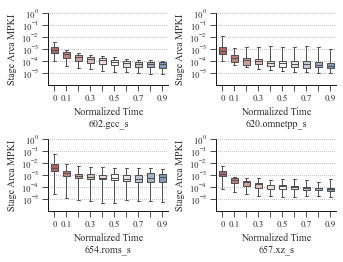

In [20]:
# wrap into 4 subplots
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="whitegrid")
fig_dims = (5, 5)
number_list = [602, 620, 554, 657]
# fig_dims = (5, 2)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(fig_label_fontsize)
pp, fig = easypyplot.pdf.plot_setup('stagelifespan', fig_dims)
ax_list = []
for plotid, plotnum in enumerate(number_list[:4]):
    df = pd.DataFrame(all_data[plotnum], columns=['durationBin', 'epochMPbI'])

    fig_ax = fig.add_subplot(2, 2, plotid + 1) # Knob: plot the first subgraph of a 1x1 grid, i.e., no subplot mode
    easypyplot.format.turn_off_box(fig_ax)

    # Show each distribution with both violins and points
    # sns.violinplot(x="durationBin", y="epochMPbI", data=df, inner="points", palette="Set3", cut=0, linewidth=1, ax=fig_ax)
    # sns.despine(left=True)
    palatte_vlag_reverse = sns.color_palette("vlag",n_colors=11)
    palatte_vlag_reverse.reverse()
    sns.boxplot(x="durationBin", y="epochMPbI", data=df, width=0.6, whis=[0, 95], fliersize=0.5, palette=palatte_vlag_reverse, showfliers=False)
    # sns.stripplot(x="durationBin", y="epochMPbI", data=df, size=1, color=".3", linewidth=0)
    fig_ax.set_yscale('log')
    fig_ax.set_ylim([0.1, 100000.0])
    print(fig_ax.get_ylim())
    fig_ax.set_yticks([1, 10, 100, 1000, 10000, 100000])
    fig_ax.set_yticklabels(['$\mathregular{10^{-5}}$', '$\mathregular{10^{-4}}$', '$\mathregular{10^{-3}}$', '$\mathregular{10^{-2}}$', '$\mathregular{10^{-1}}$', '$\mathregular{10^{0}}$'])
    fig_ax.set_xticklabels(['0', '0.1', '', '0.3', '', '0.5', '', '0.7', '', '0.9'])
    fig_ax.set_xlabel('Normalized Time\n' + plot_name[plotnum], size = fig_label_fontsize)
    fig_ax.set_ylabel("Stage Area MPKI", size = fig_label_fontsize)
    ax_list.append(fig_ax)
# staged breakdown and committed breakdown
# hit_colors = easypyplot.color.color_scale('#C8E6C9', 2, low=0.85, high=0.9)[::-1]
# miss_colors = easypyplot.color.color_scale('#E6AECF', 2, low=0.85, high=0.9)[::-1]
# overflow_color = [easypyplot.color.COLOR_SET[5]]
# fig_bar_colors = hit_colors + miss_colors + overflow_color
# y_pos = [0, 0]
# scheme_list = ['Read Hit', 'Write Hit (no overflow)', 'Read Miss', 'Write Miss', 'Write Overflow']

plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.0,
                    right=0.9,
                    top=0.6,
                    wspace=0.4,
                    hspace=0.4)
for ax in ax_list:
    easypyplot.format.resize_ax_box(ax, hratio=0.75)

In [21]:
''' Save figures'''
# fig.savefig('/scorpio/home/liyiwei/tmp/graph_stagelifespan_554.pdf', format="pdf", bbox_inches = 'tight')
# fig.savefig('/scorpio/home/liyiwei/tmp/graph_stagelifespan_620.pdf', format="pdf", bbox_inches = 'tight')
fig.savefig('./graph_stagelifespan.pdf', format="pdf", bbox_inches = 'tight')